### 机器学习1

In [1]:
import sys
sys.path.append("../utils")
from imgload import *
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import math

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

##### knn

### knn 手写字分类

In [2]:
img = cv2.imread('img/digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
x = np.array(cells)
x.shape


(50, 100, 20, 20)

#### 准备数据

In [3]:
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()



In [4]:
train.shape, train_labels.shape

((2500, 400), (2500, 1))

####  训练和预测

In [5]:
knn = cv2.ml.KNearest_create()
knn.train(train,cv2.ml.ROW_SAMPLE, train_labels)
ret, results, neighbours ,dist = knn.findNearest(test, 3)
correct = np.count_nonzero(results == test_labels)
correct*100.0/10000

22.91

#### 其他数据

result:  [[1.]] 

result:  [[1.]] 

neighbours:  [[1. 0. 1.]] 

distance:  [[ 32. 490. 850.]]


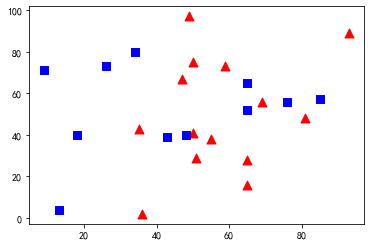

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
responses = np.random.randint(0,2,(25,1)).astype(np.float32)

newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)
print ("result: ", results,"\n")

print ("result: ", results,"\n")
print ("neighbours: ", neighbours,"\n")
print ("distance: ", dist)

red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
plt.show()

### 测试

result:  [[0.]] 

result:  [[0.]] 

neighbours:  [[0. 0. 0.]] 

distance:  [[ 529.  538. 1105.]]


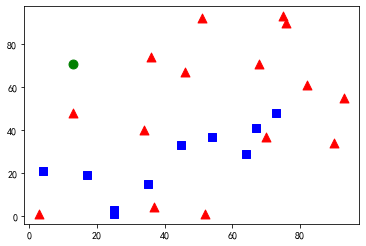

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
responses = np.random.randint(0,2,(25,1)).astype(np.float32)

newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)
print ("ret: ", ret,"\n")

print ("result: ", results,"\n")
print ("neighbours: ", neighbours,"\n")
print ("distance: ", dist)

red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
plt.show()

#### 单张图片进行 knn

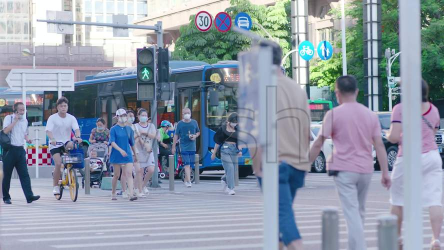

In [15]:
url_path = 'https://img0.baidu.com/it/u=3909136053,2301493036&fm=253&fmt=auto&app=138&f=JPEG?w=889&h=500'
ori_img = url2img(url_path)

ori_img = cv2.resize(ori_img, dsize=None, dst=None, fx=0.5, fy=0.5)
gray = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)

cv2pil(ori_img)


In [16]:
h,w = gray.shape
data = gray.reshape(h * w, 1)
data = np.float32(data)
label = np.array([x.tolist() for x in data],dtype='float32')
knn = cv2.ml.KNearest_create()
knn.train(data, cv2.ml.ROW_SAMPLE, label)
ret, results, neighbours ,dist = knn.findNearest(data, 10)
img = results.reshape(h, w)
plt.imshow(img, 'gray')

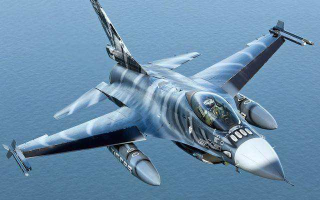

In [84]:
#### 图像灰度分级 


url_path = "https://img1.baidu.com/it/u=1379934549,3175915599&fm=253&fmt=auto&app=120&f=JPEG?w=1280&h=800"
url_path = "https://gimg2.baidu.com/image_search/src=http%3A%2F%2Finews.gtimg.com%2Fnewsapp_bt%2F0%2F14051640529%2F1000.jpg&refer=http%3A%2F%2Finews.gtimg.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1656892185&t=9f3707be57fbe4f8b9979cfb5fbc10ec"
ori_img = url2img(url_path)
ori_img = cv2.resize(ori_img, dsize=None, fx=0.5, fy=0.5)
cv2pil(ori_img)

In [117]:
def quality_sampling(cv2_img, level = 4):
    """ 采样：灰度分级 """
    h,w , channel = cv2_img.shape
    level = 256 if level >256 else level
    img_new = np.zeros(cv2_img.shape, np.uint8) ### 空白图像
    levels = [int(x*256/level) for x in range(256) if int(x*256/level) < 256] ### 根据灰度等级确定灰度区间数值
    
    ##### 图像灰度分类
    for i in range(h):
        for j in range(w):
            for c in range(channel):
                value = cv2_img[i, j][c]  
                current_level = [levels[idx] for idx, next_level in enumerate(levels[1:]) if value >= levels[idx] and next_level > value]
                if len(current_level)==0:
                    current_level = max(levels)
                img_new[i,j][c] = np.uint8(current_level)
    del cv2_img
    return img_new   
    


img1 = quality_sampling(ori_img, level=2)
img2 = quality_sampling(ori_img, level=4)
img3 = quality_sampling(ori_img, level=8)
img4 = quality_sampling(ori_img, level=12)
img5 = quality_sampling(ori_img, level=16)
img6 = quality_sampling(ori_img, level=32)
img7 = quality_sampling(ori_img, level=64)
img8 = quality_sampling(ori_img, level=96)
img9 = quality_sampling(ori_img, level=128)
img10 = quality_sampling(ori_img, level=256)


In [109]:
img13 = quality_sampling(ori_img, level=255)

#### 显示结果

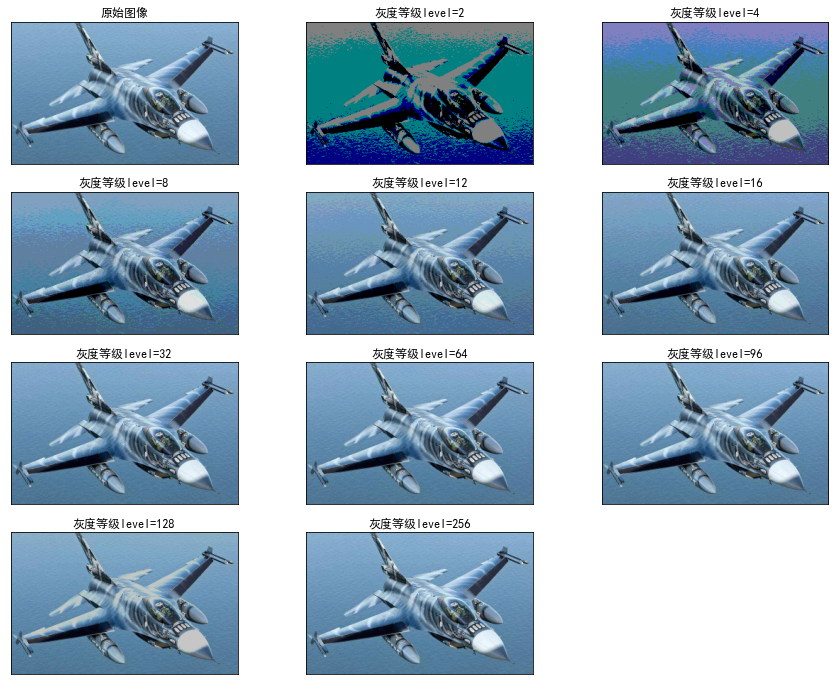

In [127]:
img_levels = [ori_img, img1, img2, img3, img4, img5, img6, img7, img8, img9, img10, ]
img_labels = [ '原始图像', '灰度等级level=2', '灰度等级level=4', '灰度等级level=8', 
              '灰度等级level=12', '灰度等级level=16', '灰度等级level=32', '灰度等级level=64',\
                  '灰度等级level=96', '灰度等级level=128','灰度等级level=256']

plt.figure(figsize=(15, 12))
for i in range(len(img_levels)):
    plt.subplot(4,3,i +1 ), plt.imshow(img_levels[i][:,:,::-1]), plt.title(img_labels[i]), plt.xticks([]), plt.yticks([])



## k-mearns

In [8]:


def kmeans(cv2_img, num_cluster=4):
    data = ori_img.reshape((-1, 3))
    data = np.float32(data)
    h,w,channel = cv2_img.shape
    #### 中点
    criteria = (cv2.TERM_CRITERIA_EPS +
                cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    # 设置标签
    flags = cv2.KMEANS_RANDOM_CENTERS
    
    compactness, labels, centers = cv2.kmeans(data, K=num_cluster, bestLabels=None, criteria=criteria, attempts=10, flags=flags)
    centers = np.uint8(centers) ### 数据类型转换
    img_kmeans =  centers[labels.flatten()] ## 转换
    img_kmeans = img_kmeans.reshape((cv2_img.shape))
    
    del cv2_img
    return img_kmeans
    
url_path = "https://img1.baidu.com/it/u=1379934549,3175915599&fm=253&fmt=auto&app=120&f=JPEG?w=1280&h=800"
url_path = "https://gimg2.baidu.com/image_search/src=http%3A%2F%2Finews.gtimg.com%2Fnewsapp_bt%2F0%2F14051640529%2F1000.jpg&refer=http%3A%2F%2Finews.gtimg.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1656892185&t=9f3707be57fbe4f8b9979cfb5fbc10ec"
ori_img = url2img(url_path)

# # img_kmeans = kmeans(ori_img, num_cluster=4)
# # img_kmeans2 = kmeans(ori_img, num_cluster=8)
# # img_quali = quality_sampling(ori_img, level=4)
# plt.figure(figsize=(15, 12))
# plt.subplot(1,3,1), plt.imshow(ori_img[:,:,::-1]), plt.title("原始图像"), plt.xticks([]), plt.yticks([])
# plt.subplot(1,3,2), plt.imshow(img_kmeans[:,:,::-1]), plt.title("聚类cluster=4"),plt.xticks([]), plt.yticks([])
# plt.subplot(1,3,3), plt.imshow(img_kmeans2[:,:,::-1]), plt.title("聚类cluster=8"),plt.xticks([]), plt.yticks([])


### kmeans 聚类

retval, bestLabels, centers = cv2.kmeans(data, K, bestLabels, criteria, attempts, flags, centers=None)

**1. 函数参数：**

data:  需要分类数据，最好是np.float32的数据，每个特征放一列。
K:  聚类个数 
bestLabels：预设的分类标签或者None
criteria：迭代停止的模式选择，这是一个含有三个元素的元组型数。格式为（type, max_iter, epsilon） 其中，type有如下模式：
            cv2.TERM_CRITERIA_EPS ：精确度（误差）满足epsilon，则停止。
            cv2.TERM_CRITERIA_MAX_ITER：迭代次数超过max_iter，则停止。
            cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER：两者结合，满足任意一个结束。
attempts：重复试验kmeans算法次数，将会返回最好的一次结果

flags：初始中心选择，可选以下两种：
    v2.KMEANS_PP_CENTERS：使用kmeans++算法的中心初始化算法，即初始中心的选择使眼色相差最大.详细可查阅kmeans++算法。(Use kmeans++ center initialization by Arthur and Vassilvitskii)
    cv2.KMEANS_RANDOM_CENTERS：每次随机选择初始中心（Select random initial centers in each attempt.）

**2. 返回值：**

compactness：紧密度，返回每个点到相应重心的距离的平方和
labels：结果标记，每个成员被标记为分组的序号，如 0,1,2,3,4...等
centers：由聚类的中心组成的数组

In [141]:
img_kmeans1 =  kmeans(ori_img, num_cluster=2)
img_kmeans2 =  kmeans(ori_img, num_cluster=4)
img_kmeans3 =  kmeans(ori_img, num_cluster=8)
img_kmeans4 =  kmeans(ori_img, num_cluster=16)
img_kmeans5 =  kmeans(ori_img, num_cluster=32)
img_kmeans6 =  kmeans(ori_img, num_cluster=64)
img_kmeans7 =  kmeans(ori_img, num_cluster=128)
img_kmeans8 =  kmeans(ori_img, num_cluster=256)

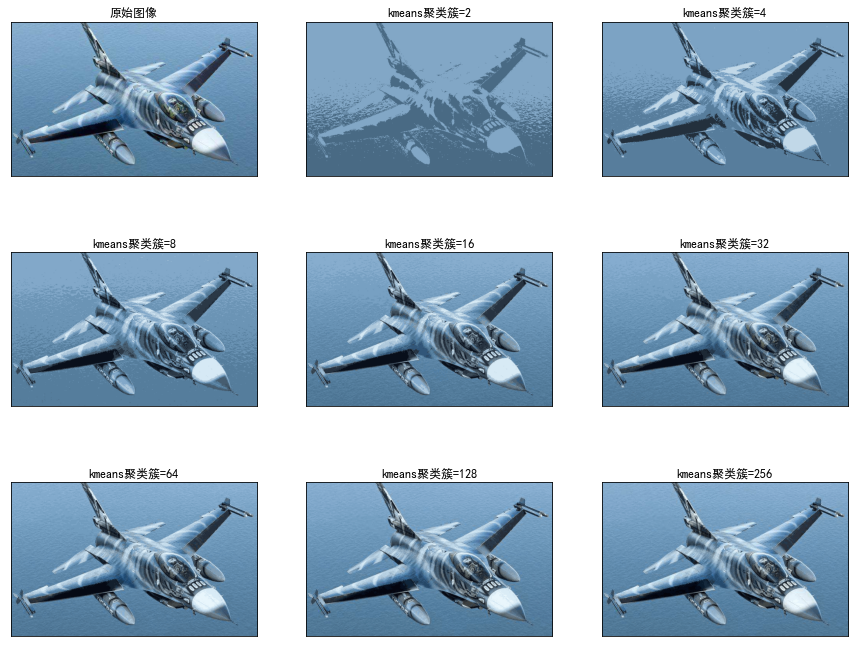

In [143]:
img_kms = [ori_img, img_kmeans1, img_kmeans2, img_kmeans3, img_kmeans4, img_kmeans5, img_kmeans6, img_kmeans7, img_kmeans8 ]
img_labels = [ '原始图像', 'kmeans聚类簇=2',
                'kmeans聚类簇=4',
                'kmeans聚类簇=8',
                'kmeans聚类簇=16',
                'kmeans聚类簇=32',
                'kmeans聚类簇=64',
                'kmeans聚类簇=128',
                'kmeans聚类簇=256',]

plt.figure(figsize=(15, 12))
for i in range(len(img_kms)):
    plt.subplot(3,3,i +1 ), plt.imshow(img_kms[i][:,:,::-1]), plt.title(img_labels[i]), plt.xticks([]), plt.yticks([])


#### 比较量化差异 vs kmeans()

In [9]:

url_path = "https://img1.baidu.com/it/u=1379934549,3175915599&fm=253&fmt=auto&app=120&f=JPEG?w=1280&h=800"
ori_img = url2img(url_path)
img_kmeans = kmeans(ori_img, num_cluster=4)
img_kmeans2 = kmeans(ori_img, num_cluster=8)
img_quali = quality_sampling(ori_img, level=4)
img_quali2 = quality_sampling(ori_img, level=8)


NameError: name 'quality_sampling' is not defined

(<matplotlib.axes._subplots.AxesSubplot at 0x1dbfca81320>,
 Text(0.5, 1.0, '图像量化level=8'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

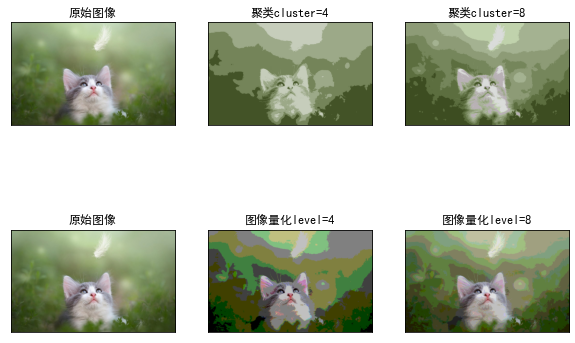

In [148]:
plt.figure(figsize=(10, 7))
plt.subplot(2,3,1), plt.imshow(ori_img[:,:,::-1]), plt.title("原始图像"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2), plt.imshow(img_kmeans[:,:,::-1]), plt.title("聚类cluster=4"),plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3), plt.imshow(img_kmeans2[:,:,::-1]), plt.title("聚类cluster=8"),plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4), plt.imshow(ori_img[:,:,::-1]), plt.title("原始图像"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5), plt.imshow(img_quali[:,:,::-1]), plt.title("图像量化level=4"),plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6), plt.imshow(img_quali2[:,:,::-1]), plt.title("图像量化level=8"),plt.xticks([]), plt.yticks([])


In [12]:

url_path = "https://img1.baidu.com/it/u=1379934549,3175915599&fm=253&fmt=auto&app=120&f=JPEG?w=1280&h=800"
ori_img = url2img(url_path)

img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)


In [20]:
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
mag, ang = cv2.cartToPolar(gx, gy) ### cv2.cartToPolar用于将直角坐标转换为极坐标,


#### 分类方法

In [26]:
SZ=20
bin_n = 16
img = cv2.imread('img/digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
train_cells = [ i[:50] for i in cells ]
test_cells = [ i[50:] for i in cells]


In [27]:
def hog(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi)) # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists) # hist is a 64 bit vector
    return hist


#### 提取 hog特征

In [53]:
hogdata = [np.array(list(map(hog,row))) for row in train_cells]
trainData = np.float32(hogdata).reshape(-1,64)
testData = np.float32(hogdata).reshape(-1,bin_n*4)
responses = np.float32(np.repeat(np.arange(10),250)[:,np.newaxis])

k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = np.repeat(k,250)[:,np.newaxis]


##### knn


In [65]:

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, train_labels)
ret, results, neighbours ,dist = knn.findNearest(testData, 10)
mask = results==responses
correct = np.count_nonzero(mask)
correct/results.size

0.93

##### svn

In [73]:

svm = cv2.ml.SVM_create() 
svm.setType(cv2.ml.SVM_C_SVC)  # SVM类型  
svm.setKernel(cv2.ml.SVM_LINEAR) # 使用线性核  
svm.setC(1.0)
ret = svm.train(trainData, cv2.ml.ROW_SAMPLE, train_labels)


In [76]:
svm.save("svm.dat")

In [77]:
svm.predict(testData)

(0.0,
 array([[0.],
        [0.],
        [0.],
        ...,
        [9.],
        [9.],
        [9.]], dtype=float32))

In [82]:
trainingData, labels

(matrix([[501.,  10.],
         [255.,  10.],
         [501., 255.],
         [ 10., 501.]], dtype=float32),
 array([ 1, -1, -1, -1]))

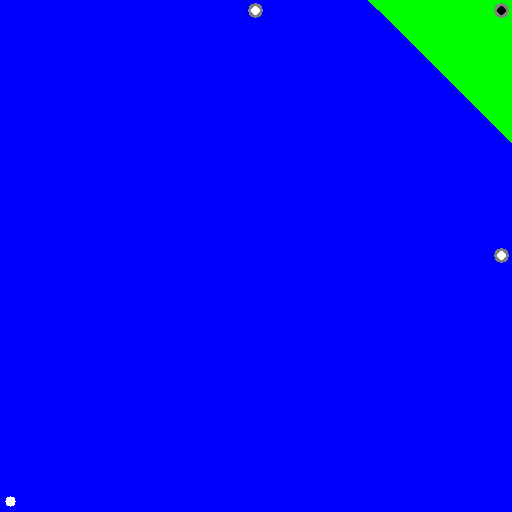

In [86]:
## [init]
labels = np.array([1, -1, -1, -1])
trainingData = np.matrix([[501, 10], [255, 10], [501, 255], [10, 501]], dtype=np.float32)

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
svm.train(trainingData, cv2.ml.ROW_SAMPLE, labels)
# Data for visual representation
width = 512
height = 512
image = np.zeros((height, width, 3), dtype=np.uint8)

# Show the decision regions given by the SVM
## [show]
green = (0,255,0)
blue = (255,0,0)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        sampleMat = np.matrix([[j,i]], dtype=np.float32)
        response = svm.predict(sampleMat)[1]
        if response == 1:
            image[i,j] = green
        elif response == -1:
            image[i,j] = blue

# Show the training data
## [show_data]
thickness = -1
cv2.circle(image, (501,  10), 5, (  0,   0,   0), thickness)
cv2.circle(image, (255,  10), 5, (255, 255, 255), thickness)
cv2.circle(image, (501, 255), 5, (255, 255, 255), thickness)
cv2.circle(image, ( 10, 501), 5, (255, 255, 255), thickness)
## [show_data]

# Show support vectors
## [show_vectors]
thickness = 2
sv = svm.getUncompressedSupportVectors() ### 获取向量保留的坐标
for i in range(sv.shape[0]):
    cv2.circle(image, (int(sv[i,0]), int(sv[i,1])), 6, (128, 128, 128), thickness)
## [show_vectors]

cv2pil(image)

In [90]:
img = cv2.imread('messi_2.jpg')
mask = cv2.imread('mask2.png',0)


-1